In [1]:
import numpy as np
import tkinter as tk
import turtle
import random
import matplotlib.pyplot as plt
from mlxtend.classifier import MultiLayerPerceptron as MLP
from mlxtend.data import loadlocal_mnist
from mlxtend.preprocessing import shuffle_arrays_unison
from mlxtend.preprocessing import standardize
from mlxtend.preprocessing import minmax_scaling
from PIL import Image, ImageOps
from turtle import Turtle, Screen
from PIL import Image, EpsImagePlugin, ImageOps
from mlxtend.plotting import plot_learning_curves

def plot_digit(X, y):
    img = X[0].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('Seu resultado foi: %d' % y)
    plt.show()


In [2]:
X_treino, y_treino = loadlocal_mnist(
  images_path='./data/train-images.idx3-ubyte', 
  labels_path='./data/train-labels.idx1-ubyte'
)
X_treino, y_treino = shuffle_arrays_unison((X_treino, y_treino), random_seed=1)

X_teste, y_teste = loadlocal_mnist(
  images_path='./data/t10k-images.idx3-ubyte', 
  labels_path='./data/t10k-labels.idx1-ubyte'
)
X_teste, y_teste = shuffle_arrays_unison((X_teste, y_teste), random_seed=1)


In [3]:
net = MLP(
    hidden_layers=[250],
    l2=0.0,
    l1=0.0,
    epochs=250,
    eta=0.001,
    momentum=0.0,
    decrease_const=0.0,
    minibatches=250,
    random_seed=1,
    print_progress=3
)

In [4]:
#normalização
X_treino_std, params = standardize(
                        X_treino,
                        columns=range(X_treino.shape[1]),
                        return_params=True
                      )

X_teste_std = standardize(
                X_teste,
                columns=range(X_teste.shape[1]),
                params=params
              )

In [5]:
net.fit(X_treino_std, y_treino)

print('\nPrecisão do treino: %.2f%%' % (100 * net.score(X_treino_std, y_treino)))
print('\nPrecisão de teste: %.2f%%' % (100 * net.score(X_teste_std, y_teste)))

Iteration: 250/250 | Cost 0.00 | Elapsed: 0:11:02 | ETA: 0:00:00


Precisão do treino: 100.00%

Precisão de teste: 97.51%


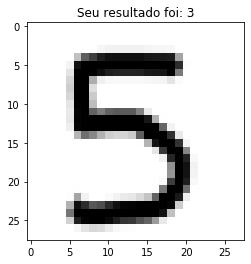

In [24]:
t = Turtle("turtle")

def dragging(x, y):
    t.ondrag(None)
    t.setheading(t.towards(x, y))
    t.goto(x, y)
    t.ondrag(dragging)

def rigthclick(x, y):
    t.fillcolor("red")
    t.penup()

def midleclick(x, y):
    t.fillcolor("green")
    t.pendown()

def erase():
    t.clear()
    
def imagearray():
    t.fillcolor("black")
    ts = turtle.getscreen()
    ts.getcanvas().postscript(file="number.eps")
    
    size = (28, 28)

    img = Image.open('./number.eps').convert('L')
    img_neg = ImageOps.invert(img)
    n_img = img_neg.resize(size)
    img_array = np.array(n_img)
    img_array_1d = img_array.flatten()

    X_hand, y_hand = loadlocal_mnist(
      images_path='./data/t10k-images.idx3-ubyte', 
      labels_path='./data/t10k-labels.idx1-ubyte'
    )
    
    X_hand, y_hand = shuffle_arrays_unison((X_hand, y_hand), random_seed=1)
    X_hand[9999] = img_array_1d

    X_hand_std = standardize(
                    X_hand,
                    columns=range(X_hand.shape[1]),
                    params=params
                )

    X_hand_puro = X_hand[9999:]

    plot_digit(X_hand_puro, net.predict(X_hand_std[9999:]))
    turtle.bye()
    
def wakeupturtle():
    screen = Screen()
    t.pensize(60)
    t.speed(-1)
    t.shapesize(3,3,3)
    t.fillcolor("green")
    
    turtle.listen()
    t.ondrag(dragging)
    turtle.onscreenclick(rigthclick, 3)
    turtle.onscreenclick(midleclick, 2)
    turtle.onkey(imagearray, "space")
    turtle.onkey(erase, "d")
    turtle.onkey(erase, "D")
    
    screen.mainloop()

wakeupturtle()